**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>Session 4 Assignment
Author: <span style='background:yellow'>Mohaymen Sameen</span><br>
Student number: <span style='background:yellow'>627650</span><br>
Date: <span style='background:yellow'>19-05-2021</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* \<add other packages\>

From these we will need the following libraries:

In [2]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')
    
#Pandas as pd
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')
    
#Seaborn as sb
try:
    import seaborn as sn
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sn
    print('seaborn was not installed, installed and imported')
    
#Sklearn 
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
seaborn already installed, only imported
sklearn already installed, only imported


We are going to use the datafile <span style='background:yellow'>Star.csv</span>. This contains data from <span style='background:yellow'>differet stars and can possibly predict the star type</span>.


In [3]:
my_data = pd.read_csv("Stars.csv", sep=',', skipinitialspace=True) 

Here's a quick look at the data:

In [4]:
my_data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


**ATTRIBUTES:**
**Temperature** -- K,
**L** -- L/Lo (Luminosity),
**R** -- R/Ro (Radius),
**AM** -- Mv (Absolute Magnitude),
**Color** -- General Color of Spectrum,
**Spectral_Class** -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types,
**Type** -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

**Type**
from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5

Variables:
**Type** (The outcome variable 'y')
**L, R, AM** (predictor variables 'x')

*note:* You can score a +.5 point if you don't just pick randomly your variables, but use either a pairplot (a plot showing all scatterplots between all possible pairs of variables), a heatmap, and/or a correlation matrix, to pick some that at least have a reasonable correlation.

             Temperature      L      R    A_M   Type
Temperature        1.000  0.393  0.064 -0.420  0.411
L                  0.393  1.000  0.527 -0.693  0.677
R                  0.064  0.527  1.000 -0.609  0.661
A_M               -0.420 -0.693 -0.609  1.000 -0.955
Type               0.411  0.677  0.661 -0.955  1.000


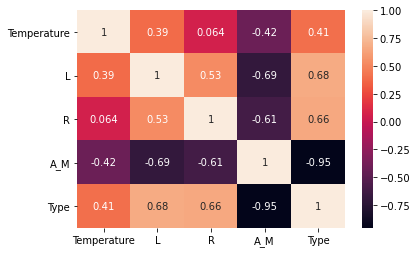

In [5]:
#Here you can see a correlation matrix
corrMatrix = my_data.corr().round(3)
print(corrMatrix)

#Heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting <span style='background:yellow'>Luminosity</span> using <span style='background:yellow'>the R variable (aka radius)</span>. Below a visualisation of these two:

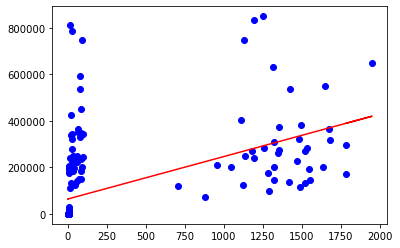

In [6]:
radiusX = np.array(my_data['R'])
luminosityY = np.array(my_data['L'])

xRes = radiusX.reshape((-1,1))
yRes = luminosityY.reshape((-1,1))

sx2 = radiusX.var()
mxy = np.array(radiusX*luminosityY).mean()
b1=(mxy-radiusX.mean()*luminosityY.mean())/sx2
b0=luminosityY.mean()-b1*radiusX.mean()

#my prediction 
myPrediction = b0 + b1*xRes

plt.scatter(radiusX,luminosityY, color='blue')
plt.plot(radiusX,myPrediction, color='red')

As can be seen from the scatterplot there seems to be <span style='background:yellow'>some relationship between the two attributes. For example, the smaller the radius of the star, the less luminious it is. That's why most of the stars with a small radius are clustered in the 200000 range</span>

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of <span style='background:yellow'>Radius (R)</span>:

In [7]:
from sklearn.model_selection import train_test_split
xRes_train, xRes_test, yRes_train, yRes_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)

Now setup the linear regression model and fit our testing data:

In [8]:
myModel=LinearRegression().fit(xRes_train, yRes_train) 

Lets see how well the model performed with the test data, by visualisation:

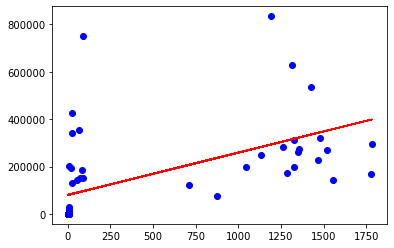

In [9]:
predictions = myModel.predict(xRes_test)
plt.scatter(xRes_test,yRes_test, color='blue')
plt.plot(xRes_test, predictions, color='red')

<span style='background:yellow'>There seems to be some sort of relationship at the X-axis' 5000 to 10000 range as most of the stars are clustered in this region</span>

Besides from a visual, we can also use some metrics.

In [10]:
import statsmodels.api as sm

newX=sm.add_constant(radiusX) #add the constant
newModel=sm.OLS(luminosityY,newX).fit()
newPred=newModel.predict(newX)
newModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     91.28
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.62e-18
Time:                        12:57:07   Log-Likelihood:                -3204.5
No. Observations:                 240   AIC:                             6413.
Df Residuals:                     238   BIC:                             6420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.386e+04   1.09e+04      5.881      0.000    4.25e+04    8.53e+04
x1           182.6798     19.120      9.554      0.000     145.013     220.346
==============================================================================
Omnibus:                      138.676   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.464
Skew:                           2.420   Prob(JB):                    8.64e-150
Kurtosis:                       9.724   Cond. No.                         625.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='background:yellow'>The R^2 is the coefficent of determination, and this is used to measure the variability of the the factors. You can see in the summary that the value of R^2 is 0.277. The coef values aka the coefficient values are the values that multiply with the x variables (predicators). For example, we see the values 0.00006386 as the constant and the X variable. So it'll be y=182.67X+0.00006386 which is the regression line</span>

We can also check how well our model worked by using the testing data:

In [11]:
myModel.score(xRes_test, yRes_test)

0.33145883759007577

<span style='background:yellow'>The outcome number which is the score shows the accuracy of the model that we've created</span>

Now we repeat all these steps, but using the other x-variable: <span style='background:yellow'>Temperature</span>.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict Luminosity based on Temperature

Below a visualisation of these two:

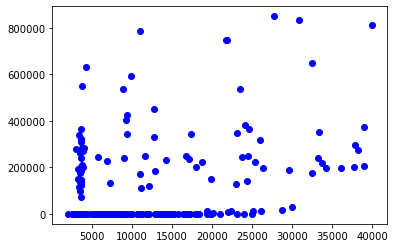

In [12]:
temperatureX = np.array(my_data['Temperature'])
radiusX = np.array(my_data['R'])
luminosityY = np.array(my_data['L'])
plt.scatter(temperatureX,luminosityY, color='blue')

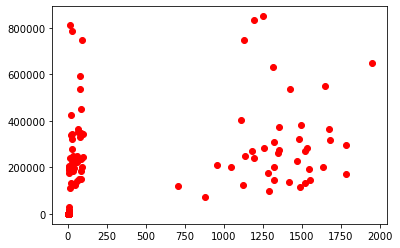

In [13]:
plt.scatter(radiusX,luminosityY, color='red')

As can be seen from the scatterplot there seems to be a <span style='background:yellow'>relationship with temperature and luminosty. The higher the temperature, the higher the luminosity. This can be seen for example in the 25000 to 40000 range. There are all higher than before this range</span>

Creating again the training/testing sets and the model itself:

In [14]:
from sklearn.model_selection import train_test_split
xRes = temperatureX.reshape((-1,1))
yRes = luminosityY.reshape((-1,1))
xRes_train, xRes_test, yRes_train, yRes_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)

Now lets see how this performs:

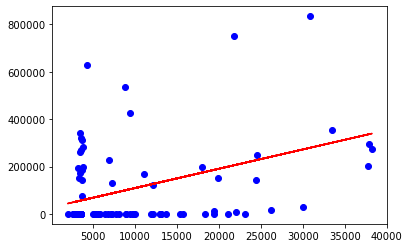

In [15]:
myModel=LinearRegression().fit(xRes_train, yRes_train) 
predictions = myModel.predict(xRes_test)
plt.scatter(xRes_test,yRes_test, color='blue')
plt.plot(xRes_test, predictions, color='red')


<span style='background:yellow'>Surprisingly the outcome of this scatter plot is pretty much similar to the first x-variable which was radius. So maybe it shows that luminosity and temperature is also closely related to luminosity and radius</span>

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict <span style='background:yellow'>Luminosity</span> based on <span style='background:yellow'>radius</span> and <span style='background:yellow'>temperature</span> separately. In this chapter we are going to look if we can make an even better prediction if we try to predict <span style='background:yellow'>luminosity</span> based on BOTH of these together.

We begin with combining the two x's into one X:

In [16]:
temperatureX = np.array(my_data['Temperature'])
radiusX = np.array(my_data['R'])
luminosityY = np.array(my_data['L'])

tempRes=temperatureX.reshape((-1,1))
radRes=radiusX.reshape((-1,1))
lumiRes=luminosityY.reshape((-1,1))

combine=np.hstack((tempRes,radRes))

To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [17]:
from sklearn.model_selection import train_test_split
xRes_train, xRes_test, yRes_train, yRes_test = train_test_split(combine, lumiRes, test_size=0.4, random_state=101)
myModel=LinearRegression().fit(xRes_train, yRes_train) 

A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

In [18]:
# Model summary
import statsmodels.api as sm

newX=sm.add_constant(combine) 
newModel=sm.OLS(luminosityY,newX).fit()
newPred=newModel.predict(newX)
newModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.26e-27
Time:                        12:57:08   Log-Likelihood:                -3180.7
No. Observations:                 240   AIC:                             6367.
Df Residuals:                     237   BIC:                             6378.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5427.2054   1.38e+04     -0.394      0.694   -3.26e+04    2.17e+04
x1             6.7826      0.941      7.204      0.000       4.928       8.637
x2           174.6347     17.390     10.042      0.000     140.375     208.894
==============================================================================
Omnibus:                      124.879   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.465
Skew:                           2.173   Prob(JB):                    1.08e-120
Kurtosis:                       9.029   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Accuracy Score
myModel.score(xRes_test, yRes_test)

0.37828298037149677

Instead of looking at the R-square, we should be looking at the adjusted R-square. <span style='background:yellow'>This is because the adjusted R-squared is a modified version of R-squared that adjusts for predictors that are not significant in a regression model</span>.

We also see more rows now in the 'coef' column. <span style='background:yellow'>This is because now there's an additional x variable in the scope. We had the luminosity and radius before, but now since we added the other x variable which is temperature, there are now 3 coefficients</span>.

<span style='background:yellow'>This model performs differently as it is taking 2 predictors at the same time. In bivariate regression, we only use 2 variables, one which is the outcome variable and 2, which is the predictor. But in multivariate regression, there are 3 variables, one which is the outcome variable (luminosity), 2 which is the predictor (radius) and the last being temperature.</span>

A last thing to do would be to check the VIF's:

In [20]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]

[2.3645130150836144, 1.0041407663534527, 1.004140766353453]

<span style='background:yellow'>What we see in the results are the variation inflation factors. You can probably see that the first variable is the VIF constant which we can ignore, but the last two are almost identical. If the VIF value is more than 10, we can leave them out since it indicates a multicollinearity problem. However, our values are 1.00414076635.. which is below 10</span>

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict <span style='background:yellow'>the luminosity</span> by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [21]:
X = my_data[['Temperature', 'R', 'A_M', 'Type']]
Y = my_data['L']

We could first have a quick look at the results of this model:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
X_test.shape[0]

myModel=LinearRegression().fit(X_train,y_train) 

newX=sm.add_constant(X_test) #add the constant
newModel=sm.OLS(y_test,newX).fit()
newPred=newModel.predict(newX)
newModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      L   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     24.63
Date:                Sat, 22 May 2021   Prob (F-statistic):           7.88e-14
Time:                        12:57:08   Log-Likelihood:                -1255.1
No. Observations:                  96   AIC:                             2520.
Df Residuals:                      91   BIC:                             2533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.485e+05   8.49e+04      1.748      0.084   -2.02e+04    3.17e+05
Temperature     1.9839      1.504      1.319      0.191      -1.004       4.972
R             114.1371     32.398      3.523      0.001      49.782     178.492
A_M         -9866.8203   4196.893     -2.351      0.021   -1.82e+04   -1530.208
Type        -2.413e+04   2.66e+04     -0.908      0.366   -7.69e+04    2.87e+04
==============================================================================
Omnibus:                       73.519   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.851
Skew:                           2.521   Prob(JB):                     1.68e-94
Kurtosis:                      12.085   Cond. No.                     9.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#Accuracy Score
myModel.score(X_test, y_test)

0.4532497060981583

However we have to be careful with those VIF's. So lets see:

In [24]:
# add code here to show the VIF's.
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [25]:
# add your function code here.


Lets run the function, and then use the result to create a new model:

In [26]:
# add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [27]:
# add your code here.


Finally lets see how this new model performs:

In [28]:
# add code here to model and fit the new X with the y, and show the model summary and accuracy score:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation and practical example is given for the cross-validation.

<span style='background:yellow'>Earlier we used the hold-out method to split the datasets into training and testing sets. But there is another way to achieve this. For example, in this section we will talk about the cross validation method. In the code block below we split the main dataset (my_data) into three smaller datasets which are train, validate and test using only numpy and pandas</span>

In [29]:
train_size = 0.6
validate_size = 0.2
train, validate, test = np.split(my_data.sample(frac=1), [int(train_size * len(my_data)), int((validate_size + train_size) * len(my_data))])

<span style='background:yellow'>Now you have three datasets which are train, validate and test. We split the datasets in the following way. The training set is the largest one and it's size is 0.6. The validate and test are split evenly and their sizes are 0.2 each. One of the benefits is that cross-validation can be used to train the model with mutilple test-train datasets whereas hold-out just uses one dataset</span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the Polynomial regression method is explained.

<span style='background:yellow'>This regression method is one of many. Polynomial works best or most optimally if the data points clearly will not fit a linear regression. This method also finds a relationship between the Y and X variables and draws a line through the data points</span>

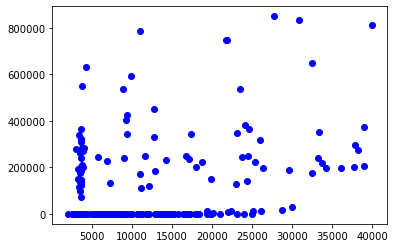

In [30]:
# Lets use the temperature and luminosity variables from the Stars.csv file
my_data = pd.read_csv('Stars.csv')

#Our Y variable will be luminosity and the X variable will be the temperature
temperatureX = my_data['Temperature']
luminosityY = my_data['L']

#Lets plot then on the scatter plot
plt.scatter(temperatureX,luminosityY, color='blue')

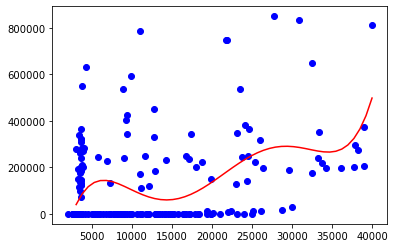

In [31]:
#Now lets plot the polynomial regression line

#This is our polynomial model
mymodel = np.poly1d(np.polyfit(temperatureX, luminosityY , 5))

#lets start with the first position which is 3000, and the end position which is 40000
myline = np.linspace(3000, 40000)

plt.scatter(temperatureX, luminosityY, color='blue')
plt.plot(myline, mymodel(myline), color='red')


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----